In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#csv files
population_df = pd.read_csv("Illinois_Population.csv")
crime_df = pd.read_csv("total_crime_area.csv")
census_to_communityarea_key = pd.read_csv("community_area_to_census.csv")

In [3]:
#get dataframe info
population_df.head()

,Unnamed: 0,Name,Total Population,Public Use Microdata Area,Year
0,0,"Jo Daviess, Carroll, Whiteside & Lee Counties ...",132179,104,2012
1,1,"Rock Island County PUMA, Illinois",147504,105,2012
2,2,"Henry, Mercer, Henderson, Warren, Hancock, McD...",180417,202,2012
3,3,"Adams, Pike, Brown, Schuyler & Mason Counties ...",112582,300,2012
4,4,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ...",143980,401,2012


In [4]:
#drop extra columns
population = population_df[["Name",'Total Population',"Year"]]

In [5]:
crime_df.keys()
crime_df.head()

,Unnamed: 0,Crimes Reported,Crimes Reported.1,Crimes Reported.2,Crimes Reported.3
0,Year,2012.0,2013.0,2014.0,2015.0
1,Community Area,NaN,NaN,NaN,NaN
2,0.0,6.0,3.0,2.0,2.0
3,1.0,4925.0,4433.0,3803.0,3590.0
4,2.0,4030.0,3810.0,3413.0,3109.0


In [6]:
#change name for crime_df columns and remove first three rows
crime_df_1 = crime_df.rename(columns={'Unnamed: 0':'Community Area', 'Crimes Reported':"2012", 'Crimes Reported.1':'2013',
       'Crimes Reported.2':'2014', 'Crimes Reported.3':'2015'})
crime_df_1.head()

,Community Area,2012,2013,2014,2015
0,Year,2012.0,2013.0,2014.0,2015.0
1,Community Area,NaN,NaN,NaN,NaN
2,0.0,6.0,3.0,2.0,2.0
3,1.0,4925.0,4433.0,3803.0,3590.0
4,2.0,4030.0,3810.0,3413.0,3109.0


In [7]:
crime_df_2 = crime_df_1.drop([0,1,2])

In [8]:
#check crime_df
crime_df_2.count()
crime_df_2.head()

,Community Area,2012,2013,2014,2015
3,1.0,4925.0,4433.0,3803.0,3590.0
4,2.0,4030.0,3810.0,3413.0,3109.0
5,3.0,4976.0,4289.0,3815.0,3662.0
6,4.0,2338.0,2218.0,1898.0,1770.0
7,5.0,1920.0,1723.0,1541.0,1395.0


In [9]:
crime_df_2.dtypes
crime_df_2['Community Area'] = crime_df_2['Community Area'].astype(float)

In [10]:
#unstack crime data to match up with population better
crime_2012 = crime_df_2[["Community Area",'2012']]
crime_2013 = crime_df_2[["Community Area",'2013']]
crime_2014 = crime_df_2[["Community Area",'2014']]
crime_2015 = crime_df_2[["Community Area",'2015']]
crime_2015.head()

,Community Area,2015
3,1.0,3590.0
4,2.0,3109.0
5,3.0,3662.0
6,4.0,1770.0
7,5.0,1395.0


In [11]:
#Rename dataframes
crime_2012 = crime_2012.rename(columns={'2012':'Total Crimes'})
crime_2013 = crime_2013.rename(columns={'2013':'Total Crimes'})
crime_2014 = crime_2014.rename(columns={'2014':'Total Crimes'})
crime_2015 = crime_2015.rename(columns={'2015':'Total Crimes'})
crime_2015.head()

,Community Area,Total Crimes
3,1.0,3590.0
4,2.0,3109.0
5,3.0,3662.0
6,4.0,1770.0
7,5.0,1395.0


In [12]:
#Add year column to dataframes
crime_2012["Year"]=2012
crime_2013["Year"]=2013
crime_2014["Year"]=2014
crime_2015["Year"]=2015
crime_2015.head()



,Community Area,Total Crimes,Year
3,1.0,3590.0,2015
4,2.0,3109.0,2015
5,3.0,3662.0,2015
6,4.0,1770.0,2015
7,5.0,1395.0,2015


In [13]:
#add crime dfs together
crime_total = crime_2012.append(crime_2013, sort=True)
crime_total = crime_total.append(crime_2014, sort=True)
crime_total = crime_total.append(crime_2015, sort=True)
crime_total.count()

Community Area    308
Total Crimes      308
Year              308
dtype: int64

In [14]:
#check column names for merge
census_to_communityarea_key.keys()

Index(['Unnamed: 0', 'Community', 'Community \nNumber', 'Public Use Area'], dtype='object')

In [15]:
#rename to match crime_df and population_df
census_to_comm = census_to_communityarea_key.rename(columns={"Community \nNumber":'Community Area','Public Use Area':'Name'})

In [16]:
#merge census areas to crime data
crime_to_census = pd.merge(crime_total, census_to_comm, how='outer', on=['Community Area'])


In [17]:
#check merge
crime_to_census.head()
crime_to_census.count()

Community Area    308
Total Crimes      308
Year              308
Unnamed: 0        308
Community         308
Name              260
dtype: int64

In [18]:
#drop na values where community areas don't match up to census data
crime_to_census = crime_to_census.dropna()

In [19]:
#check again
crime_to_census.count()
crime_to_census.nunique()

Community Area     65
Total Crimes      252
Year                4
Unnamed: 0         65
Community          65
Name               19
dtype: int64

In [20]:
#sum all of the community area crimes to match the census by year
crime_to_census_gb = crime_to_census.groupby(['Year','Name'], as_index=False)['Total Crimes'].sum()

In [21]:
#display groupby
crime_to_census_gb.head()

,Year,Name,Total Crimes
0,2012,"Chicago City (Central)--Near North Side, Loop ...",20927.0
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",13177.0
2,2012,Chicago City (North)--Lake View & Lincoln Park...,12706.0
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",8288.0
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",8567.0


In [22]:
crime_to_census_gb.nunique()

Year             4
Name            19
Total Crimes    76
dtype: int64

In [23]:
#merge population data to census data
population_census = pd.merge(crime_to_census_gb, population, how='left', on=['Name','Year'])



In [24]:
#check dataframe
population_census.count()
population_census.nunique()

Year                 4
Name                19
Total Crimes        76
Total Population    76
dtype: int64

In [25]:
population_census.head()

,Year,Name,Total Crimes,Total Population
0,2012,"Chicago City (Central)--Near North Side, Loop ...",20927.0,127124
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",13177.0,167887
2,2012,Chicago City (North)--Lake View & Lincoln Park...,12706.0,161170
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",8288.0,145745
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",8567.0,147691


In [26]:
#crime per capita by census area
population_census["Crime Per Capita"] = population_census.apply(lambda row: row['Total Crimes'] / row['Total Population'], axis=1)

In [27]:
population_census.head()

,Year,Name,Total Crimes,Total Population,Crime Per Capita
0,2012,"Chicago City (Central)--Near North Side, Loop ...",20927.0,127124,0.164619
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",13177.0,167887,0.078487
2,2012,Chicago City (North)--Lake View & Lincoln Park...,12706.0,161170,0.078836
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",8288.0,145745,0.056866
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",8567.0,147691,0.058006


In [28]:
#pivot crime data by year
crime_rate_population_pivot = population_census.pivot(index='Name',columns='Year', values=['Crime Per Capita','Total Population','Total Crimes'])
crime_rate_population_pivot.head()

Crime Per Capita            \
Year                                                           2012      2013   
Name                                                                            
Chicago City (Central)--Near North Side, Loop &...         0.164619  0.148385   
Chicago City (North)--Edgewater, Uptown & Roger...         0.078487  0.068419   
Chicago City (North)--Lake View & Lincoln Park ...         0.078836  0.069587   
Chicago City (North)--West Ridge, Lincoln Squar...         0.056866  0.052906   
Chicago City (Northwest)--Irving Park, Albany P...         0.058006  0.050690   

                                                                        \
Year                                                    2014      2015   
Name                                                                     
Chicago City (Central)--Near North Side, Loop &...  0.131907  0.131038   
Chicago City (North)--Edgewater, Uptown & Roger...  0.060520  0.057836   
Chicago City (North)--Lake View & Lincoln Park ...  0.059700  0.056632   
Chicago City (North)--West Ridge, Lincoln Squar...  0.046492  0.042508   
Chicago City (Northwest)--Irving Park, Albany P...  0.045137  0.047066   

                                                   Total Population            \
Year                                                           2012      2013   
Name                                                                            
Chicago City (Central)--Near North Side, Loop &...         127124.0  132871.0   
Chicago City (North)--Edgewater, Uptown & Roger...         167887.0  167162.0   
Chicago City (North)--Lake View & Lincoln Park ...         161170.0  162430.0   
Chicago City (North)--West Ridge, Lincoln Squar...         145745.0  146506.0   
Chicago City (Northwest)--Irving Park, Albany P...         147691.0  148787.0   

                                                                        \
Year                                                    2014      2015   
Name                                                                     
Chicago City (Central)--Near North Side, Loop &...  136968.0  141554.0   
Chicago City (North)--Edgewater, Uptown & Roger...  164391.0  164412.0   
Chicago City (North)--Lake View & Lincoln Park ...  163919.0  165171.0   
Chicago City (North)--West Ridge, Lincoln Squar...  147381.0  147595.0   
Chicago City (Northwest)--Irving Park, Albany P...  145956.0  145478.0   

                                                   Total Crimes           \
Year                                                       2012     2013   
Name                                                                       
Chicago City (Central)--Near North Side, Loop &...      20927.0  19716.0   
Chicago City (North)--Edgewater, Uptown & Roger...      13177.0  11437.0   
Chicago City (North)--Lake View & Lincoln Park ...      12706.0  11303.0   
Chicago City (North)--West Ridge, Lincoln Squar...       8288.0   7751.0   
Chicago City (Northwest)--Irving Park, Albany P...       8567.0   7542.0   

                                                                      
Year                                                   2014     2015  
Name                                                                  
Chicago City (Central)--Near North Side, Loop &...  18067.0  18549.0  
Chicago City (North)--Edgewater, Uptown & Roger...   9949.0   9509.0  
Chicago City (North)--Lake View & Lincoln Park ...   9786.0   9354.0  
Chicago City (North)--West Ridge, Lincoln Squar...   6852.0   6274.0  
Chicago City (Northwest)--Irving Park, Albany P...   6588.0   6847.0

In [29]:
crime_rate_population_pivot = crime_rate_population_pivot.reset_index()

In [30]:
crime_rate_population_pivot.head()

Name Crime Per Capita  \
Year                                                                2012   
0     Chicago City (Central)--Near North Side, Loop ...         0.164619   
1     Chicago City (North)--Edgewater, Uptown & Roge...         0.078487   
2     Chicago City (North)--Lake View & Lincoln Park...         0.078836   
3     Chicago City (North)--West Ridge, Lincoln Squa...         0.056866   
4     Chicago City (Northwest)--Irving Park, Albany ...         0.058006   

                                   Total Population                      \
Year      2013      2014      2015             2012      2013      2014   
0     0.148385  0.131907  0.131038         127124.0  132871.0  136968.0   
1     0.068419  0.060520  0.057836         167887.0  167162.0  164391.0   
2     0.069587  0.059700  0.056632         161170.0  162430.0  163919.0   
3     0.052906  0.046492  0.042508         145745.0  146506.0  147381.0   
4     0.050690  0.045137  0.047066         147691.0  148787.0  145956.0   

               Total Crimes                             
Year      2015         2012     2013     2014     2015  
0     141554.0      20927.0  19716.0  18067.0  18549.0  
1     164412.0      13177.0  11437.0   9949.0   9509.0  
2     165171.0      12706.0  11303.0   9786.0   9354.0  
3     147595.0       8288.0   7751.0   6852.0   6274.0  
4     145478.0       8567.0   7542.0   6588.0   6847.0

In [31]:
crime_rate_population_pivot.keys()

MultiIndex(levels=[['Crime Per Capita', 'Total Population', 'Total Crimes', 'Name'], [2012, 2013, 2014, 2015, '']],
           labels=[[3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=[None, 'Year'])

In [32]:
crime_rate_population_pivot.tail()

Name Crime Per Capita  \
Year                                                                2012   
14    Chicago City (West)--Austin, Belmont Cragin & ...         0.151246   
15    Chicago City (West)--North & South Lawndale, H...         0.199579   
16    Chicago City (West)--West Town, Near West Side...         0.128130   
17    Cook County (North)--Maine, Norwood Park Towns...         0.009612   
18    Cook County (West)--Leyden, Norwood Park (Sout...         0.013990   

                                   Total Population                      \
Year      2013      2014      2015             2012      2013      2014   
14    0.140996  0.126740  0.120121         188448.0  188559.0  191620.0   
15    0.192197  0.171807  0.160594         201675.0  198328.0  202175.0   
16    0.113232  0.100742  0.096572         174815.0  174862.0  178197.0   
17    0.008209  0.008027  0.008226         186023.0  186248.0  186363.0   
18    0.016245  0.015251  0.013287         130954.0  131303.0  132059.0   

               Total Crimes                             
Year      2015         2012     2013     2014     2015  
14    189826.0      28502.0  26586.0  24286.0  22802.0  
15    202511.0      40250.0  38118.0  34735.0  32522.0  
16    181760.0      22399.0  19800.0  17952.0  17553.0  
17    186596.0       1788.0   1529.0   1496.0   1535.0  
18    131409.0       1832.0   2133.0   2014.0   1746.0

In [33]:
#calculate sums of year columns
population_sum = crime_rate_population_pivot.loc[:,'Total Population'].sum()

In [34]:
population_sum

Year
2012    2957146.0
2013    2961767.0
2014    2968979.0
2015    2974031.0
dtype: float64

In [35]:
crime_sum =  crime_rate_population_pivot.loc[:,'Total Crimes'].sum()

In [36]:
crime_sum

Year
2012    318306.0
2013    290939.0
2014    260648.0
2015    250510.0
dtype: float64

In [37]:
#Make new summary df
chicago_total=pd.concat([population_sum, crime_sum], axis=1).reset_index()

In [38]:
chicago_total = chicago_total.rename(columns={0:'Population',1:'Crimes'})
chicago_total.head()

,Year,Population,Crimes
0,2012,2957146.0,318306.0
1,2013,2961767.0,290939.0
2,2014,2968979.0,260648.0
3,2015,2974031.0,250510.0


In [39]:
#caluclate crime rate for all of chicago
chicago_total.loc[0,'Crime Rate'] = chicago_total.loc[0,"Crimes"]/chicago_total.loc[0,"Population"]
chicago_total.loc[1,'Crime Rate'] = chicago_total.loc[1,"Crimes"]/chicago_total.loc[1,"Population"]
chicago_total.loc[2,'Crime Rate'] = chicago_total.loc[2,"Crimes"]/chicago_total.loc[2,"Population"]
chicago_total.loc[3,'Crime Rate'] = chicago_total.loc[3,"Crimes"]/chicago_total.loc[3,"Population"]
chicago_total.head()


,Year,Population,Crimes,Crime Rate
0,2012,2957146.0,318306.0,0.107640
1,2013,2961767.0,290939.0,0.098232
2,2014,2968979.0,260648.0,0.087790
3,2015,2974031.0,250510.0,0.084232


In [40]:
#set variable
x=chicago_total["Year"]
y1=chicago_total["Population"]
y2=chicago_total["Crimes"]


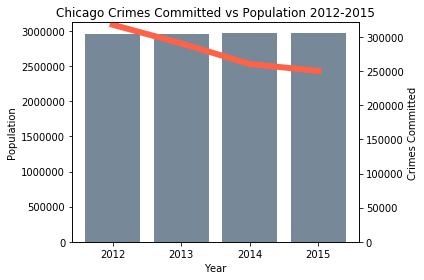

In [49]:
#graph of crime rate and population by year
fig, ax1 = plt.subplots()

#population axis
ax1.bar(x, y1, label="Population", color='lightslategrey')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population')

#make new axis for crime data
ax2 = ax1.twinx()
#crime data
ax2.plot(x, y2, label="Crimes", color='tomato', linewidth=6)
ax2.set_ylim(bottom=0)
ax2.set_ylabel('Crimes Committed')  



plt.title("Chicago Crimes Committed vs Population 2012-2015")
plt.xticks(x)

fig.tight_layout()

plt.show()

In [50]:
#save figure
fig.savefig("crime_vs_pop.png", bbox_inches="tight")